In [1]:
#Importing libraries 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv('../raw_data/treated.csv')
data.head()

Unnamed: 0      Country  Year  fertility Code  avg_years_of_schooling
0           0  Afghanistan  2007       6.56  AFG                     2.9
1           1  Afghanistan  1995       7.61  AFG                     1.9
2           2  Afghanistan  2008       6.37  AFG                     3.0
3           3  Afghanistan  2017       4.63  AFG                     3.8
4           4  Afghanistan  1994       7.57  AFG                     1.8

In [3]:
data

Unnamed: 0      Country  Year  fertility Code  avg_years_of_schooling
0              0  Afghanistan  2007       6.56  AFG                     2.9
1              1  Afghanistan  1995       7.61  AFG                     1.9
2              2  Afghanistan  2008       6.37  AFG                     3.0
3              3  Afghanistan  2017       4.63  AFG                     3.8
4              4  Afghanistan  1994       7.57  AFG                     1.8
...          ...          ...   ...        ...  ...                     ...
5121        5121     Zimbabwe  2010       4.03  ZWE                     7.3
5122        5122     Zimbabwe  2000       3.75  ZWE                     6.5
5123        5123     Zimbabwe  2017       3.71  ZWE                     8.2
5124        5124     Zimbabwe  2002       3.72  ZWE                     6.9
5125        5125     Zimbabwe  2001       3.73  ZWE                     6.7

[5126 rows x 6 columns]

In [4]:
def preproc(data:pd.DataFrame) -> pd.DataFrame:
    '''
    Fines adjustments on dataset
    '''
    #Removing columns
    data.drop(columns=['Unnamed: 0', 'Code'], inplace=True)

    #Ordering by year and set it as index
    data.sort_values('Year', inplace=True)
    data.set_index('Year', inplace=True)
    
    return data

In [5]:
df = preproc(data)
df.head()

Country  fertility  avg_years_of_schooling
Year                                               
1960     Germany       2.37                    7.53
1960    Thailand       6.15                    2.07
1960  Kazakhstan       4.56                    3.07
1960     Vietnam       6.35                    2.01
1960       Kenya       7.95                    1.21

In [6]:
def list_X_y(data:pd.DataFrame) -> list:
    '''
    Given a countries dataset, this function returns
    two lists of dataframes, ie., lists containing one dataframe per country.
    '''
    countries = data.Country.unique().tolist()

    X = []
    y = []
    
    new_df = pd.DataFrame()

    for country in countries:
        new_df = data[data['Country']==country][['fertility', 'avg_years_of_schooling']]
        
        if new_df.shape[0] == 34: #Considering only countries that has 34 samples (34 is the max number of samples)
            X.append(new_df.head(33))
            y.append(new_df['avg_years_of_schooling'].tail(1))
        else:
            pass
    
    #Transforming X to a numpy array
    X = np.array(X)
    #Transforming y to a numpy array and adding one dimension
    y = np.array(y)
    y = np.expand_dims(y.astype(np.float32), axis=-1)

    return X, y

In [9]:
X, y = list_X_y(df)

In [10]:
#Splits into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [61]:
model = Sequential()
model.add(SimpleRNN(units=20, activation='tanh'))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="linear"))

In [62]:
model.compile(loss='mse', 
              optimizer='adam', #change to adam
                metrics=['mae'])

In [63]:
es = EarlyStopping(patience=15)

history = model.fit(X_train, y_train,
    validation_split = 0.2,
    callbacks=[es],
    epochs=1000,
    verbose=1)

Epoch 1/1000
3/3 [==============================] - 1s 86ms/step - loss: 48.1860 - mae: 6.3039 - val_loss: 37.9477 - val_mae: 5.5830
Epoch 2/1000
3/3 [==============================] - 0s 11ms/step - loss: 45.3256 - mae: 6.0754 - val_loss: 35.3779 - val_mae: 5.3491
Epoch 3/1000
3/3 [==============================] - 0s 10ms/step - loss: 42.5407 - mae: 5.8471 - val_loss: 32.9638 - val_mae: 5.1184
Epoch 4/1000
3/3 [==============================] - 0s 9ms/step - loss: 39.9801 - mae: 5.6318 - val_loss: 30.9705 - val_mae: 4.9113
Epoch 5/1000
3/3 [==============================] - 0s 11ms/step - loss: 37.9570 - mae: 5.4490 - val_loss: 29.1955 - val_mae: 4.7341
Epoch 6/1000
3/3 [==============================] - 0s 10ms/step - loss: 35.9875 - mae: 5.2745 - val_loss: 27.6096 - val_mae: 4.5828
Epoch 7/1000
3/3 [==============================] - 0s 10ms/step - loss: 34.1873 - mae: 5.1123 - val_loss: 26.1073 - val_mae: 4.4459
Epoch 8/1000
3/3 [==============================] - 0s 10ms/step - los

Epoch 63/1000
3/3 [==============================] - 0s 9ms/step - loss: 1.0058 - mae: 0.6861 - val_loss: 0.5156 - val_mae: 0.4932
Epoch 64/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.9487 - mae: 0.6671 - val_loss: 0.4876 - val_mae: 0.4834
Epoch 65/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.8905 - mae: 0.6421 - val_loss: 0.4557 - val_mae: 0.4634
Epoch 66/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.8379 - mae: 0.6177 - val_loss: 0.4313 - val_mae: 0.4536
Epoch 67/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.7913 - mae: 0.5960 - val_loss: 0.4060 - val_mae: 0.4409
Epoch 68/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.7444 - mae: 0.5731 - val_loss: 0.3853 - val_mae: 0.4322
Epoch 69/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.7055 - mae: 0.5554 - val_loss: 0.3685 - val_mae: 0.4271
Epoch 70/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6684 - m

3/3 [==============================] - 0s 10ms/step - loss: 0.0935 - mae: 0.1748 - val_loss: 0.0346 - val_mae: 0.1260
Epoch 126/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.0912 - mae: 0.1721 - val_loss: 0.0341 - val_mae: 0.1249
Epoch 127/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.0888 - mae: 0.1687 - val_loss: 0.0340 - val_mae: 0.1273
Epoch 128/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.0866 - mae: 0.1660 - val_loss: 0.0339 - val_mae: 0.1297
Epoch 129/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.0840 - mae: 0.1625 - val_loss: 0.0338 - val_mae: 0.1302
Epoch 130/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.0824 - mae: 0.1604 - val_loss: 0.0324 - val_mae: 0.1259
Epoch 131/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.0801 - mae: 0.1574 - val_loss: 0.0301 - val_mae: 0.1174
Epoch 132/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.0789 - mae: 0.

In [64]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 20)                460       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 13ms/step - loss: 0.0393 - mae: 0.1194


[0.039270076900720596, 0.11940212547779083]

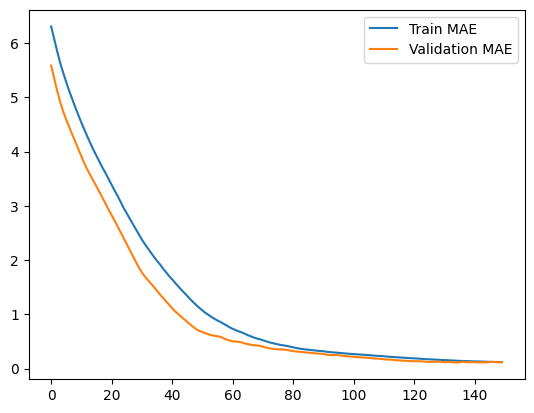

In [66]:
plt.plot(history.history["mae"], label = "Train MAE")
plt.plot(history.history["val_mae"], label = "Validation MAE")
plt.legend()

In [69]:
model.predict([[[2.37,7.53]]])

1/1 [==============================] - 0s 151ms/step


array([[11.203148]], dtype=float32)